In [1]:
%reload_ext autoreload
%autoreload 2

import os, sys
sys.path.append('../..')

import numpy as np
from astropy.io import fits
import pickle

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc_file('../../matplotlibrc')

In [2]:
def plot_val(x):
    return np.flipud(np.log(np.clip(np.abs(x), 1e-50, None)))

## view tfdata

In [3]:
abscs = pickle.load(open('../../data/abscissas/abscs_230408.p', 'rb'))
extent = np.log10((np.min(abscs['elecEk']), np.max(abscs['elecEk']), np.min(abscs['elecEk']), np.max(abscs['elecEk'])))

In [4]:
DATA_DIR = '../../data/tf/230408/elec'

In [5]:
tf = {k : np.load(f'{DATA_DIR}/{k}_rxneo.npy') \
      for k in ['hep_tf', 'lep_tf', 'lee_tf', 'hed_tf', 'cmbloss', 'lowerbound']}

In [6]:
i_rs = 0
i_x = 0
i_nBs = 6
print(abscs['rs'][i_rs])
print(abscs['x'][i_x])
print(abscs['nBs'][i_nBs])

5.000000000000001
1e-05
1.006


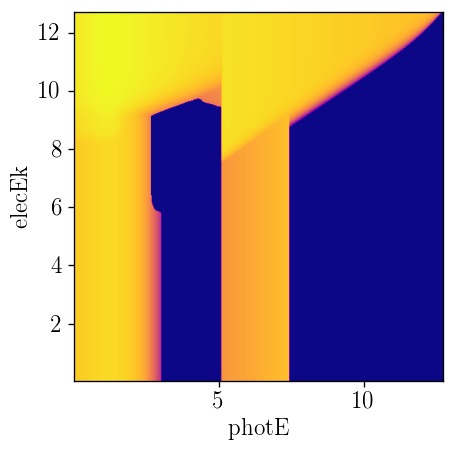

In [8]:
plt.imshow(plot_val(tf['hep_tf'][i_rs,i_x,i_nBs]),
           cmap='plasma', extent=extent)
plt.xlabel('photE')
plt.ylabel('elecEk');

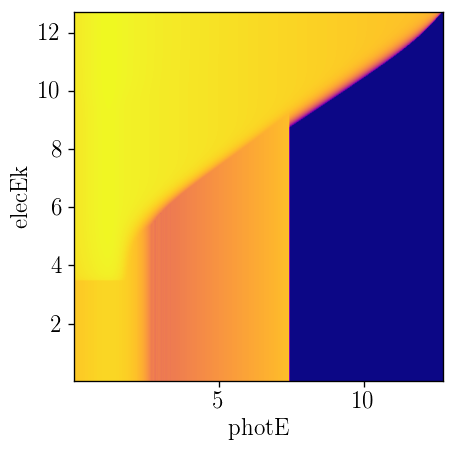

In [29]:
plt.imshow(plot_val(tf['hep_tf'][i_rs,i_x,i_nBs] + tf['lep_tf'][i_rs,i_x,i_nBs]),
           cmap='plasma', extent=extent)
plt.xlabel('photE')
plt.ylabel('elecEk');

In [ ]:
plt.imshow(plot_val(tf['lee_tf'][2, 3, 4]), cmap='plasma', extent=extent)

In [ ]:
plt.plot(abscs['elecEk'], tf['cmbloss'][0,0,0])
plt.loglog();

## view aad

In [7]:
a, d = pickle.load(open('../../data/tf/nBs_test_2/elec_tf_dlnz4.879E-2_rexo_ad.p', 'rb'))

In [19]:
i2_rs = 0
i2_x = 0

In [30]:
d.shape

(20, 500, 10, 500)

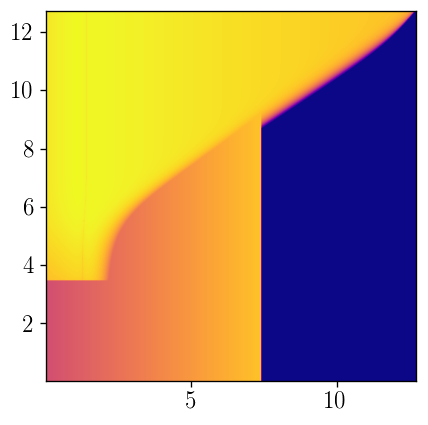

In [31]:
plt.imshow(plot_val(d[i_rs,:,i_x,:]), cmap='plasma', extent=extent);

In [3]:
! ls ../../data/tf/nBs_test_2

cmbloss.npy			 lep_tf.npy
elec_dep_dlnz4.879E-2_rexo_ad.p  lowerbound.npy
elec_depgv_rexo.npy		 phot_dep_dlnz4.879E-2_renxo_ad.p
elec_phot_tfgv_rexo.npy		 phot_depgv.npy
elec_tf_dlnz4.879E-2_rexo_ad.p	 phot_tf_dlnz4.879E-2_renxo_ad.p
hed_tf.npy			 phot_tfgv.npy
hep_tf.npy			 tmp
lee_tf.npy
